In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.simplefilter(action='ignore')

In [3]:
data = pd.read_csv("merged_feature_and_label_latest.csv")

In [4]:
data.head()

,House_ID,Comp_House_ID,Distance,Image Matched Status,Compare_House_ID,Hamming_Distace_Avg_Hash,Hamming_Distance_P_Hash,Hamming_Distance_D_Hash,Hamming_Distance_W_Hash,Hamming_Distance_Color_Hash,...,Time_taken_by_Rmse,Time_taken_by_psnr,Time_taken_by_Uqi,Time_taken_by_Ssim,Time_taken_by_Ergs,Time_taken_by_Scc,Time_taken_by_Rase,Time_Taken_by_Sam,Time_taken_by_Mssim,Time_taken_by_Vifp
0,30005001,30006900,2.39,0,30006900,16,15,15,15,1,...,0.031161,0.023700,0.091795,1.151037,0.060726,0.697608,0.044455,0.019937,1.203347,2.608985
1,30005002,30010390,2.87,0,30010390,3,12,9,4,3,...,0.024327,0.024309,0.090183,0.965166,0.055554,0.582898,0.056679,0.018194,1.112687,2.191682
2,30005002,30005022,0.00,0,30005022,16,16,16,16,3,...,0.029601,0.019884,0.108542,1.175966,0.076046,0.670715,0.093051,0.014639,1.326527,2.659097
3,30005002,30006833,4.61,0,30006833,14,16,16,15,2,...,0.028428,0.023003,0.108461,1.210498,0.069606,0.724416,0.061686,0.022305,1.369419,2.772402
4,30005003,30008786,1.54,0,30008786,16,13,16,14,4,...,0.022653,0.024633,0.103395,1.186302,0.070671,0.708848,0.064357,0.025834,1.366913,2.669365


In [5]:
data.columns

Index(['House_ID', 'Comp_House_ID', 'Distance', 'Image Matched Status',
       'Compare_House_ID', 'Hamming_Distace_Avg_Hash',
       'Hamming_Distance_P_Hash', 'Hamming_Distance_D_Hash',
       'Hamming_Distance_W_Hash', 'Hamming_Distance_Color_Hash', 'Mse_Sewar',
       'Rmse_Sewar', 'Psnr_Sewar', 'Uqi_Sewar', 'Ssim_Sewar', 'Ergas_Sewar',
       'Scc_Sewar', 'Rase_Sewar', 'Sam_Sewar', 'Msim_Sewar', 'Vifp_Sewar',
       'Time_taken_Hamming_Distace_Avg_Hash',
       'Time_taken_Hamming_Distace_P_Hash',
       'Time_taken_Hamming_Distace_D_Hash',
       'Time_taken_Hamming_Distace_W_Hash',
       'Time_taken_Hamming_Distace_Color_Hash', 'Time_taken_by_Mse',
       'Time_taken_by_Rmse', 'Time_taken_by_psnr', 'Time_taken_by_Uqi',
       'Time_taken_by_Ssim', 'Time_taken_by_Ergs', 'Time_taken_by_Scc',
       'Time_taken_by_Rase', 'Time_Taken_by_Sam', 'Time_taken_by_Mssim',
       'Time_taken_by_Vifp'],
      dtype='object')

In [6]:
data.shape

(2989, 37)

In [7]:
housing = data.drop(data.iloc[:,21:], axis=1)

In [8]:
housing.head()

,House_ID,Comp_House_ID,Distance,Image Matched Status,Compare_House_ID,Hamming_Distace_Avg_Hash,Hamming_Distance_P_Hash,Hamming_Distance_D_Hash,Hamming_Distance_W_Hash,Hamming_Distance_Color_Hash,...,Rmse_Sewar,Psnr_Sewar,Uqi_Sewar,Ssim_Sewar,Ergas_Sewar,Scc_Sewar,Rase_Sewar,Sam_Sewar,Msim_Sewar,Vifp_Sewar
0,30005001,30006900,2.39,0,30006900,16,15,15,15,1,...,81.304548,9.928507,0.641928,"(0.1267369541791091, 0.16751183713477638)",39470.300560,-0.000661,5703.202060,0.580018,(0.14516479835801313+0j),0.016178
1,30005002,30010390,2.87,0,30010390,3,12,9,4,3,...,25.764930,19.910224,0.960087,"(0.5604611161646237, 0.5694552634091014)",7708.936827,0.004084,1107.334845,0.193499,(0.5049846077978652+0j),0.043373
2,30005002,30005022,0.00,0,30005022,16,16,16,16,3,...,57.107598,12.996926,0.818091,"(0.30315072583636915, 0.3356738823554138)",19477.563740,0.003758,2816.317012,0.436310,(0.17515065023515547+0j),0.028715
3,30005002,30006833,4.61,0,30006833,14,16,16,15,2,...,69.885279,11.243090,0.784388,"(0.28763010100176123, 0.3263718296725741)",25225.261870,0.007553,3636.734852,0.444024,(0.13190017618356875+0j),0.025265
4,30005003,30008786,1.54,0,30008786,16,13,16,14,4,...,116.918509,6.773138,0.588737,"(0.33890873143525074, 0.4650570088137027)",33395.164760,0.001533,4810.283150,0.640460,(0.23223031985109208+0j),0.011374


In [9]:
housing.drop(["House_ID", "Comp_House_ID","Distance","Compare_House_ID","Psnr_Sewar","Ssim_Sewar","Msim_Sewar","Rase_Sewar"], axis = 1, inplace=True)

In [10]:
housing.head()

,Image Matched Status,Hamming_Distace_Avg_Hash,Hamming_Distance_P_Hash,Hamming_Distance_D_Hash,Hamming_Distance_W_Hash,Hamming_Distance_Color_Hash,Mse_Sewar,Rmse_Sewar,Uqi_Sewar,Ergas_Sewar,Scc_Sewar,Sam_Sewar,Vifp_Sewar
0,0,16,15,15,15,1,6610.429603,81.304548,0.641928,39470.300560,-0.000661,0.580018,0.016178
1,0,3,12,9,4,3,663.831631,25.764930,0.960087,7708.936827,0.004084,0.193499,0.043373
2,0,16,16,16,16,3,3261.277776,57.107598,0.818091,19477.563740,0.003758,0.436310,0.028715
3,0,14,16,16,15,2,4883.952243,69.885279,0.784388,25225.261870,0.007553,0.444024,0.025265
4,0,16,13,16,14,4,13669.937780,116.918509,0.588737,33395.164760,0.001533,0.640460,0.011374


In [11]:
housing.shape

(2989, 13)

In [12]:
housing['Image Matched Status'].unique()

array([0, 1])

In [13]:
house_matching = housing[housing['Image Matched Status'] == 1]

In [14]:
len(house_matching)

563

In [15]:
house_different = housing[housing['Image Matched Status'] == 0]

In [16]:
len(house_different)

2426

array([[<AxesSubplot:title={'center':'Hamming_Distace_Avg_Hash'}>,
        <AxesSubplot:title={'center':'Hamming_Distance_P_Hash'}>,
        <AxesSubplot:title={'center':'Hamming_Distance_D_Hash'}>],
       [<AxesSubplot:title={'center':'Hamming_Distance_W_Hash'}>,
        <AxesSubplot:title={'center':'Hamming_Distance_Color_Hash'}>,
        <AxesSubplot:title={'center':'Mse_Sewar'}>],
       [<AxesSubplot:title={'center':'Rmse_Sewar'}>,
        <AxesSubplot:title={'center':'Uqi_Sewar'}>,
        <AxesSubplot:title={'center':'Ergas_Sewar'}>],
       [<AxesSubplot:title={'center':'Scc_Sewar'}>,
        <AxesSubplot:title={'center':'Sam_Sewar'}>,
        <AxesSubplot:title={'center':'Vifp_Sewar'}>]], dtype=object)

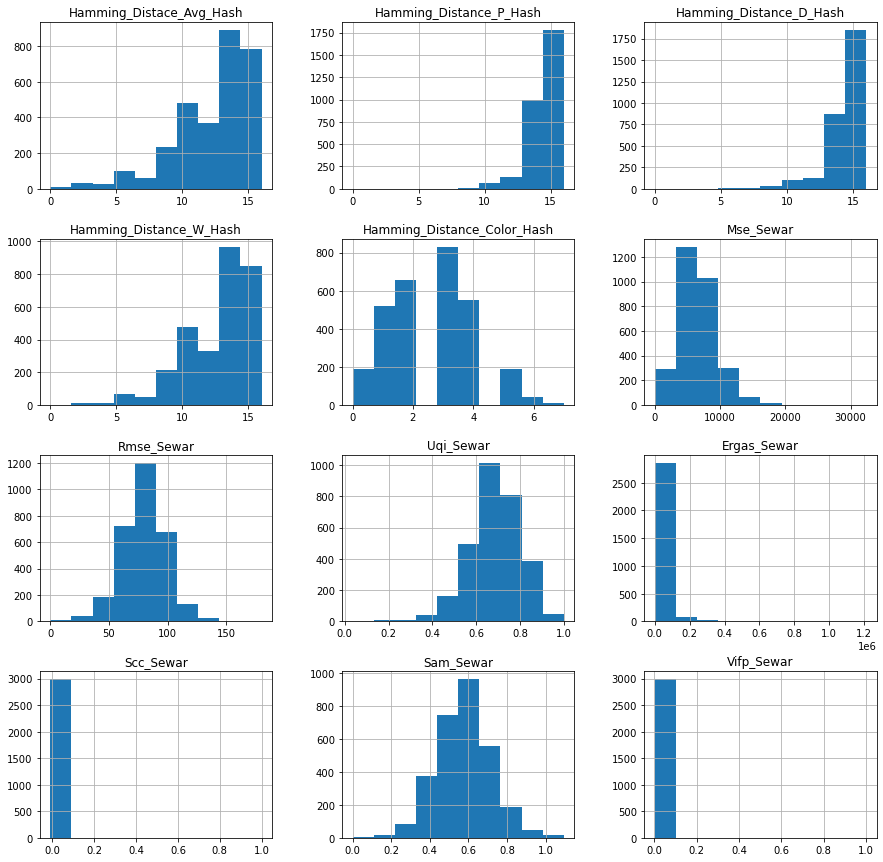

In [17]:
housing.iloc[:,1:].hist(figsize=(15,15))

some of the features are left skewed. need to take higher powers.

Hamming_Distace_Avg_Hash


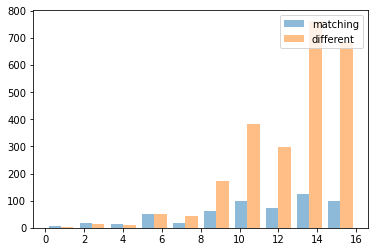

Hamming_Distance_P_Hash


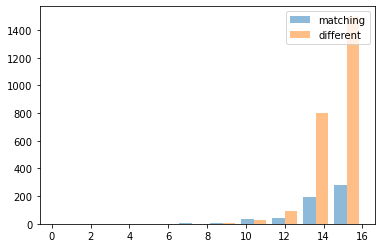

Hamming_Distance_D_Hash


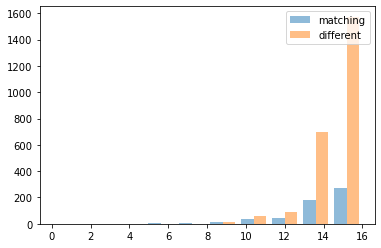

Hamming_Distance_W_Hash


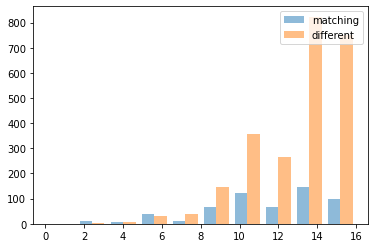

Hamming_Distance_Color_Hash


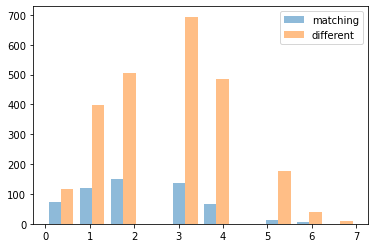

Mse_Sewar


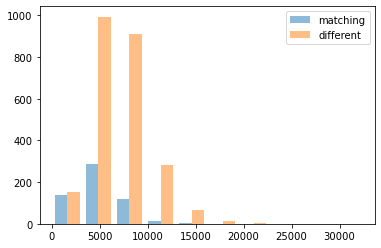

Rmse_Sewar


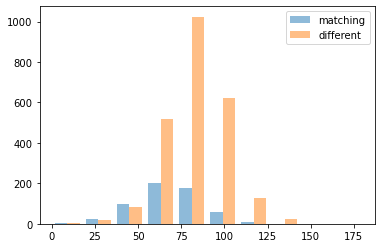

Uqi_Sewar


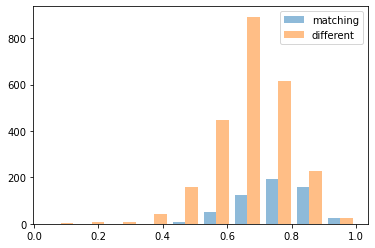

Ergas_Sewar


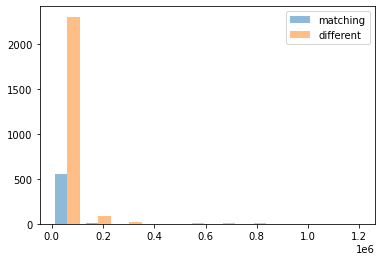

Scc_Sewar


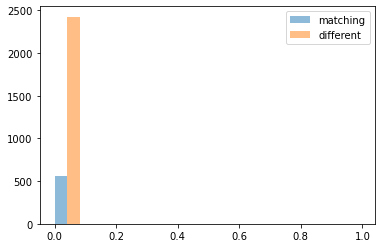

Sam_Sewar


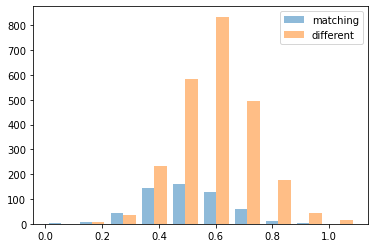

Vifp_Sewar


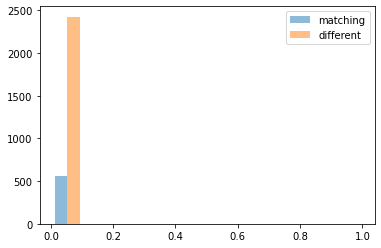

In [18]:
## Plotting for each column, separating data for the two classes
cols = housing.iloc[:,1:].columns
for col in cols:
    print(col)
    plt.hist([house_matching[col],house_different[col]],alpha=0.5, bins= 10, label=['matching','different'])
    plt.legend(loc='upper right')
    plt.show()

The datapoints for all of the dimensions are spread across matching and different classes and it is dificult to get any dimension from the histograms that can easily distinguish between the two classes.

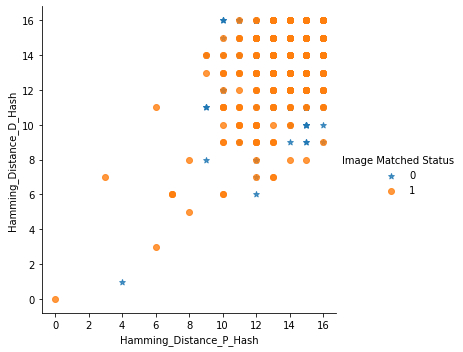

In [19]:
sns.lmplot("Hamming_Distance_P_Hash","Hamming_Distance_D_Hash",data=housing,markers=['*','o'], fit_reg=False, hue = "Image Matched Status")

In [20]:
## take cube 
housing['Hamming_Distance_P_Hash_sk'] = np.power(housing['Hamming_Distance_P_Hash'],3)
housing['Hamming_Distance_D_Hash_sk'] = np.power(housing['Hamming_Distance_D_Hash'],3)

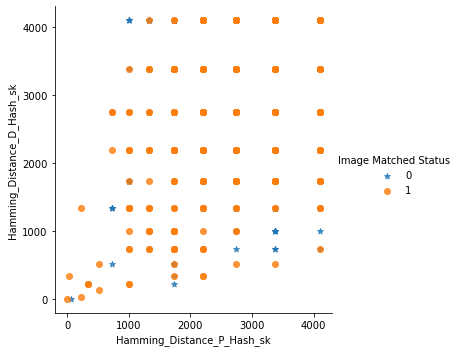

In [21]:
sns.lmplot("Hamming_Distance_P_Hash_sk","Hamming_Distance_D_Hash_sk",data=housing,markers=['*','o'], fit_reg=False, hue = "Image Matched Status")

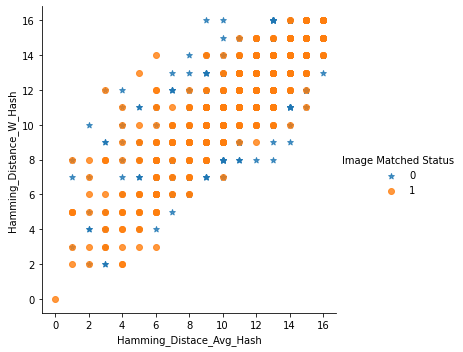

In [22]:
sns.lmplot("Hamming_Distace_Avg_Hash","Hamming_Distance_W_Hash",data=housing,markers=['*','o'], fit_reg=False, hue = "Image Matched Status")

In [23]:
## square values
housing['Hamming_Distace_Avg_Hash_sk'] = np.power(housing['Hamming_Distace_Avg_Hash'],2)
housing['Hamming_Distance_W_Hash_sk'] = np.power(housing['Hamming_Distance_W_Hash'],2)

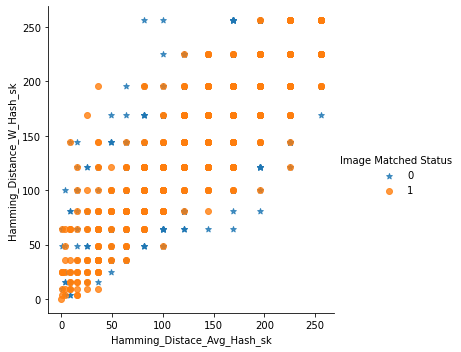

In [24]:
sns.lmplot("Hamming_Distace_Avg_Hash_sk","Hamming_Distance_W_Hash_sk",data=housing,markers=['*','o'], fit_reg=False, hue = "Image Matched Status")

array([[<AxesSubplot:title={'center':'Hamming_Distace_Avg_Hash'}>,
        <AxesSubplot:title={'center':'Hamming_Distance_P_Hash'}>,
        <AxesSubplot:title={'center':'Hamming_Distance_D_Hash'}>,
        <AxesSubplot:title={'center':'Hamming_Distance_W_Hash'}>],
       [<AxesSubplot:title={'center':'Hamming_Distance_Color_Hash'}>,
        <AxesSubplot:title={'center':'Mse_Sewar'}>,
        <AxesSubplot:title={'center':'Rmse_Sewar'}>,
        <AxesSubplot:title={'center':'Uqi_Sewar'}>],
       [<AxesSubplot:title={'center':'Ergas_Sewar'}>,
        <AxesSubplot:title={'center':'Scc_Sewar'}>,
        <AxesSubplot:title={'center':'Sam_Sewar'}>,
        <AxesSubplot:title={'center':'Vifp_Sewar'}>],
       [<AxesSubplot:title={'center':'Hamming_Distance_P_Hash_sk'}>,
        <AxesSubplot:title={'center':'Hamming_Distance_D_Hash_sk'}>,
        <AxesSubplot:title={'center':'Hamming_Distace_Avg_Hash_sk'}>,
        <AxesSubplot:title={'center':'Hamming_Distance_W_Hash_sk'}>]],
      dtype=obj

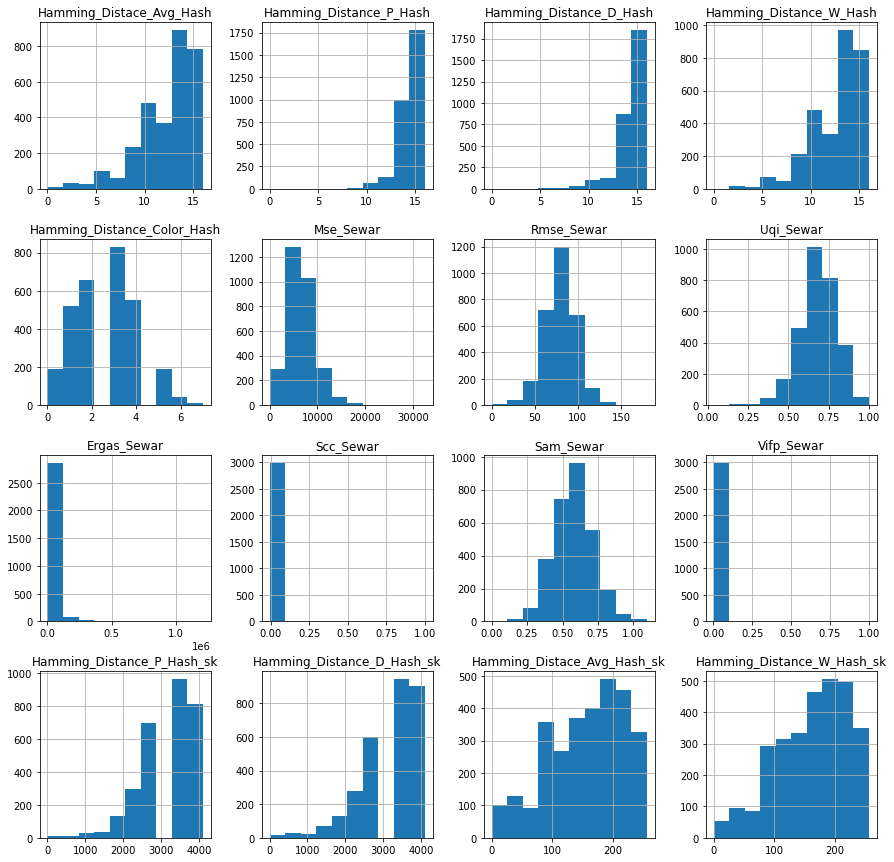

In [25]:
housing.iloc[:,1:].hist(figsize=(15,15))

In [26]:
## Drop the skewed colummns
housing.drop(["Hamming_Distace_Avg_Hash","Hamming_Distance_P_Hash","Hamming_Distance_D_Hash","Hamming_Distance_W_Hash"], axis = 1, inplace=True)

Feature Acuracy

In [27]:
## initialize the lists
feature_name = []
accuracy = []
gini_index = []
entropy = []

In [28]:
# Total size of the dataset
data_size = len(housing)

In [29]:
## Run a loop for each feature
for feature in housing.columns[1:]:
    #print(feature)
    #print(housing[feature].unique())
    ## unique values that feature can take. call them Regions
    regions = housing[feature].unique()
    reg_count = len(regions)
    ## IF the feature can take only 1 value, continue to next feature as this is more of a constant.
    if reg_count <= 1:
        continue
    ## Initialize the variables to capture the gini, accuracy and entropy numbers for the feature.
    feature_gini = 0.0
    feature_accuracy = 0.0
    feature_entropy = 0.0
    
    ## Running the loop for each region within the feature.
    for region in regions:
        #print(region)
        ## subset the data for the feature/region partition
        housing_region = housing[housing[feature] == region]
        reg_size = len(housing_region)
        ## Check proportion of matching class "1" within the partitioned data of the feature/region
        size_class_e = len(housing_region[housing_region['Image Matched Status'] == 1])
        proportion_e = size_class_e/reg_size
        
        ### Now that we have the Proportion of classes within the partitioned data for a region value, we can calculate the Information gain measures.
        
        ## accuracy
        ## Assign region accuracy as the proportion of major class
        if proportion_e >= 0.5:
            reg_accuracy = proportion_e
        else:
            reg_accuracy = (1 - proportion_e)
        ## Weighted accuracy basis the region size.
        weighted_accuracy = reg_accuracy * reg_size / data_size
        ## add the region accuracy to the feature accuracy number.
        feature_accuracy = feature_accuracy + weighted_accuracy
        
        ## Gini Index
        #Calculating Gini Purity index and normalizing basis region weight.
        reg_gini  = (np.square(proportion_e) + np.square(1 - proportion_e)) * reg_size / data_size
        #print(reg_gini)
        feature_gini = feature_gini + reg_gini
        
        ## Entropy
        # check for pure regions.
        if(proportion_e == 0 or proportion_e == 1):
            reg_entropy = 0.0
        else:
            # log_k for feature with k values (reg_count).
            reg_entropy = - (proportion_e * np.log(proportion_e) / np.log(reg_count) \
                + (1 - proportion_e) * np.log(1 - proportion_e) / np.log(reg_count)) * reg_size / data_size
        #print(reg_entropy)
        feature_entropy = feature_entropy + reg_entropy
        
    ## append the values to the lists
    feature_name.append(feature)
    gini_index.append(feature_gini)
    accuracy.append(feature_accuracy)
    entropy.append(1 - feature_entropy)

In [30]:
## creating the datafrmae of the lists.
info_gain = pd.DataFrame()
info_gain['Feature_Name'] = feature_name
info_gain['Accuracy'] = accuracy
info_gain['Gini_Index'] = gini_index
info_gain['1 - Entropy'] = entropy

In [31]:
print(info_gain)

                   Feature_Name  Accuracy  Gini_Index  1 - Entropy
0   Hamming_Distance_Color_Hash  0.811643    0.704619     0.775488
1                     Mse_Sewar  0.991636    0.991636     0.998541
2                    Rmse_Sewar  0.991636    0.991636     0.998541
3                     Uqi_Sewar  0.991636    0.991636     0.998541
4                   Ergas_Sewar  0.991636    0.991636     0.998541
5                     Scc_Sewar  0.991636    0.991636     0.998541
6                     Sam_Sewar  0.991636    0.991636     0.998541
7                    Vifp_Sewar  0.991636    0.991636     0.998541
8    Hamming_Distance_P_Hash_sk  0.817330    0.707026     0.823041
9    Hamming_Distance_D_Hash_sk  0.818668    0.710195     0.829174
10  Hamming_Distace_Avg_Hash_sk  0.815657    0.712801     0.838215
11   Hamming_Distance_W_Hash_sk  0.817665    0.712428     0.834656


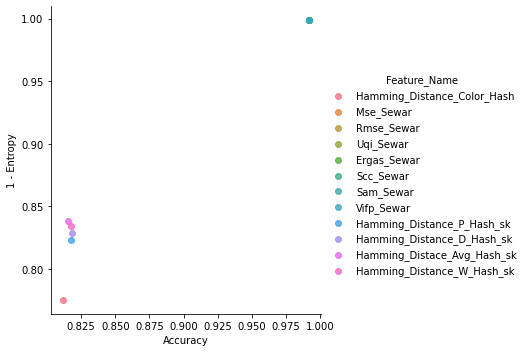

In [32]:
## plotting the Accuracy vs '1-Entropy' scatter plot
sns.lmplot("Accuracy","1 - Entropy",data=info_gain, fit_reg=False, hue = "Feature_Name")

*sewar metrics seems to be more significant

### Model

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [34]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2989 entries, 0 to 2988
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Image Matched Status         2989 non-null   int64  
 1   Hamming_Distance_Color_Hash  2989 non-null   int64  
 2   Mse_Sewar                    2989 non-null   float64
 3   Rmse_Sewar                   2989 non-null   float64
 4   Uqi_Sewar                    2989 non-null   float64
 5   Ergas_Sewar                  2989 non-null   float64
 6   Scc_Sewar                    2989 non-null   float64
 7   Sam_Sewar                    2989 non-null   float64
 8   Vifp_Sewar                   2989 non-null   float64
 9   Hamming_Distance_P_Hash_sk   2989 non-null   int64  
 10  Hamming_Distance_D_Hash_sk   2989 non-null   int64  
 11  Hamming_Distace_Avg_Hash_sk  2989 non-null   int64  
 12  Hamming_Distance_W_Hash_sk   2989 non-null   int64  
dtypes: float64(7), int

In [35]:
housing.isna().any()

Image Matched Status           False
Hamming_Distance_Color_Hash    False
Mse_Sewar                      False
Rmse_Sewar                     False
Uqi_Sewar                      False
Ergas_Sewar                    False
Scc_Sewar                      False
Sam_Sewar                      False
Vifp_Sewar                     False
Hamming_Distance_P_Hash_sk     False
Hamming_Distance_D_Hash_sk     False
Hamming_Distace_Avg_Hash_sk    False
Hamming_Distance_W_Hash_sk     False
dtype: bool

In [36]:
match_percent = housing['Image Matched Status'].value_counts()
print ("Percentage of different images:", (match_percent[0]/(match_percent[0]+match_percent[1]))*100)
print ("Percentage of matching images:", (match_percent[1]/(match_percent[0]+match_percent[1]))*100)

Percentage of different images: 81.16426898628303
Percentage of matching images: 18.83573101371696


 Imbalance in class. need to do oversampling of training data

In [37]:
# define dependant and indepandant vairables dataframe
X = housing.iloc[:,1:] # Features 
y = housing['Image Matched Status'] # Target variable 

In [38]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)

In [39]:
# instantiate the model (using the default parameters)
housinglogreg = LogisticRegression()

# fit the model with data
housinglogreg.fit(X_train,y_train)
y_pred=housinglogreg.predict(X_test)

In [40]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[728,   1],
       [159,   9]])

Text(0.5, 257.44, 'Predicted label')

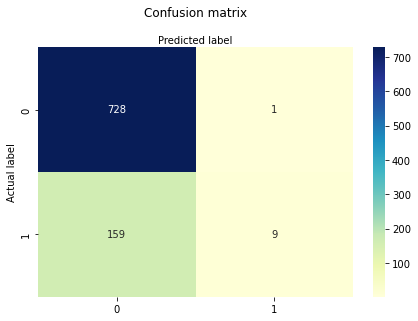

In [41]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

bad model

## logit

In [42]:
from sklearn.feature_selection import RFE
import statsmodels.api as sm
from sklearn.metrics import confusion_matrix

In [43]:
# define dependant and indepandant vairables dataframe
X = housing.iloc[:,1:] # Features 
y = housing['Image Matched Status'] # Target variable 

In [44]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=0)
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (2092, 12)
Number transactions y_train dataset:  (2092,)
Number transactions X_test dataset:  (897, 12)
Number transactions y_test dataset:  (897,)


In [45]:
logit_model=sm.Logit(y_train,X_train)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.415256
         Iterations 7
                               Results: Logit
Model:                  Logit                  Pseudo R-squared:   0.124     
Dependent Variable:     Image Matched Status   AIC:                1761.4316 
Date:                   2023-02-28 23:59       BIC:                1829.1821 
No. Observations:       2092                   Log-Likelihood:     -868.72   
Df Model:               11                     LL-Null:            -991.35   
Df Residuals:           2080                   LLR p-value:        2.7270e-46
Converged:              1.0000                 Scale:              1.0000    
No. Iterations:         7.0000                                               
-----------------------------------------------------------------------------
                             Coef.   Std.Err.    z    P>|z|   [0.025   0.975]
------------------------------------------------------------------------

In [46]:
y_pred = result.predict(X_test)
y_pred = round(y_pred)

In [47]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[704,  10],
       [157,  26]])

In [48]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.8138238573021181
Precision: 0.7222222222222222
Recall: 0.14207650273224043


## Rebalance Classes

In [49]:
!pip install imblearn

In [50]:
from imblearn.over_sampling import SMOTE

In [51]:
# define dependant and indepandant vairables dataframe
X = housing.iloc[:,1:] # Features 
y = housing['Image Matched Status'] # Target variable 

In [52]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=0)
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (2092, 12)
Number transactions y_train dataset:  (2092,)
Number transactions X_test dataset:  (897, 12)
Number transactions y_test dataset:  (897,)


In [53]:
y_train.value_counts()

0    1712
1     380
Name: Image Matched Status, dtype: int64

In [54]:
oversam = SMOTE(random_state=0)
X_train_sam,y_train_sam=oversam.fit_resample(X_train, y_train)

In [55]:
print("Number transactions X_train dataset: ", X_train_sam.shape)
print("Number transactions y_train dataset: ", y_train_sam.shape)

Number transactions X_train dataset:  (3424, 12)
Number transactions y_train dataset:  (3424,)


In [56]:
y_train_sam.value_counts()

0    1712
1    1712
Name: Image Matched Status, dtype: int64

In [57]:
# instantiate the model (using the default parameters)
housinglogreg_sam = LogisticRegression()

# fit the model with data
housinglogreg_sam.fit(X_train_sam,y_train_sam)
y_pred=housinglogreg_sam.predict(X_test)

In [58]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[463, 251],
       [ 56, 127]])

In [59]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.6577480490523969
Precision: 0.335978835978836
Recall: 0.6939890710382514


## Adasyn

In [60]:
from imblearn.over_sampling import ADASYN

In [61]:
# define dependant and indepandant vairables dataframe
X = housing.iloc[:,1:] # Features 
y = housing['Image Matched Status'] # Target variable 
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=0)

In [62]:
adasyn = ADASYN(random_state=130)
X_train_ada,y_train_ada=adasyn.fit_resample(X_train, y_train)

In [63]:
y_train_ada.value_counts()

1    1729
0    1712
Name: Image Matched Status, dtype: int64

In [64]:
# instantiate the model (using the default parameters)
housinglogreg_ada = LogisticRegression()

# fit the model with data
housinglogreg_ada.fit(X_train_ada,y_train_ada)
y_pred=housinglogreg_ada.predict(X_test)

In [65]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[458, 256],
       [ 58, 125]])

In [66]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.6499442586399108
Precision: 0.32808398950131235
Recall: 0.6830601092896175


Text(0.5, 257.44, 'Predicted label')

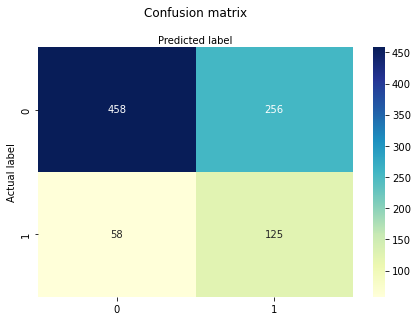

In [67]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

## smote enn

In [68]:
from imblearn.combine import SMOTEENN

In [69]:
# define dependant and indepandant vairables dataframe
X = housing.iloc[:,1:] # Features 
y = housing['Image Matched Status'] # Target variable 
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=0)

In [70]:
smtenn = SMOTEENN()
X_train_enn,y_train_enn=smtenn.fit_resample(X_train, y_train)

In [71]:
# instantiate the model (using the default parameters)
housinglogreg_enn = LogisticRegression()

# fit the model with data
housinglogreg_enn.fit(X_train_enn,y_train_enn)
y_pred=housinglogreg_enn.predict(X_test)

In [72]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[385, 329],
       [ 43, 140]])

In [73]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.5852842809364549
Precision: 0.29850746268656714
Recall: 0.7650273224043715


Text(0.5, 257.44, 'Predicted label')

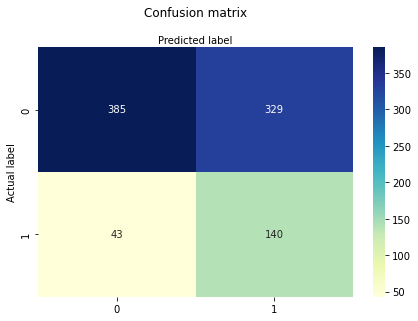

In [74]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

### Random Forest

In [75]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint

In [76]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred=rf.predict(X_test)

In [77]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[691,  23],
       [148,  35]])

In [78]:
rf_enn = RandomForestClassifier()
rf_enn.fit(X_train_enn, y_train_enn)
y_pred=rf_enn.predict(X_test)

In [79]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[578, 136],
       [ 82, 101]])

In [80]:
rf_sam = RandomForestClassifier()
rf_sam.fit(X_train_sam, y_train_sam)
y_pred=rf_sam.predict(X_test)

In [81]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[657,  57],
       [120,  63]])

In [82]:
param_dist = {'n_estimators': randint(50,500),
              'max_depth': randint(1,20)}

In [83]:
# Create a random forest classifier
rf_tune = RandomForestClassifier()

# Use random search to find the best hyperparameters
rand_search = RandomizedSearchCV(rf_tune, 
                                 param_distributions = param_dist, 
                                 n_iter=5, 
                                 cv=5)

In [84]:
rand_search.fit(X_train_enn, y_train_enn)
y_pred=rand_search.predict(X_test)

In [85]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[565, 149],
       [ 78, 105]])

Text(0.5, 257.44, 'Predicted label')

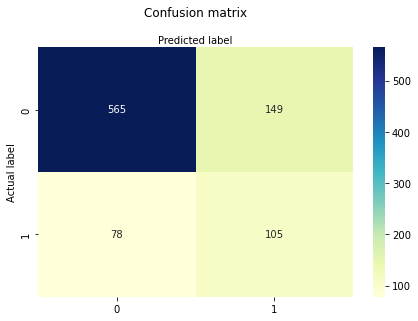

In [86]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

## Decision Tree

In [87]:
from sklearn.tree import DecisionTreeClassifier 

In [88]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
y_pred=clf.predict(X_test)

In [89]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[612, 102],
       [123,  60]])

In [90]:
clf_enn = DecisionTreeClassifier()
clf_enn.fit(X_train_enn, y_train_enn)
y_pred=clf_enn.predict(X_test)

In [91]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[541, 173],
       [ 86,  97]])

In [92]:
clf_sam = DecisionTreeClassifier()
clf_sam.fit(X_train_sam, y_train_sam)
y_pred=clf_sam.predict(X_test)

In [93]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[590, 124],
       [114,  69]])

Text(0.5, 257.44, 'Predicted label')

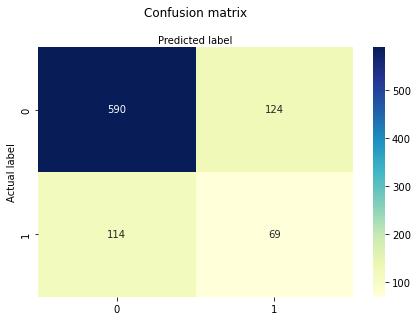

In [94]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')